In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")


In [2]:
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])

In [3]:
X_df = numerical.drop("total_claim_amount", axis = 1)

X = X_df
y = df["total_claim_amount"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

In [8]:
model.coef_

array([-7.86172127e+01, -1.22106613e+02,  1.29382217e+03,  4.41837395e-01,
       -1.06768836e+01,  1.59304967e+00,  8.02921718e+00])

In [9]:
model.intercept_

322.69400522001615

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
residuals = np.array(y_test - y_pred)

In [13]:
res_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred, "residuals": residuals})

In [14]:
res_df.head()

,y_test,y_pred,residuals
3487,120,230.080624,-110.080624
668,660,559.062818,100.937182
10315,244,340.972244,-96.972244
5332,86,268.949617,-182.949617
1523,1032,1104.937431,-72.937431


In [15]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

48603.25525355552

In [16]:
rmse = np.sqrt(mse(y_test,y_pred))
rmse

220.4614597918546

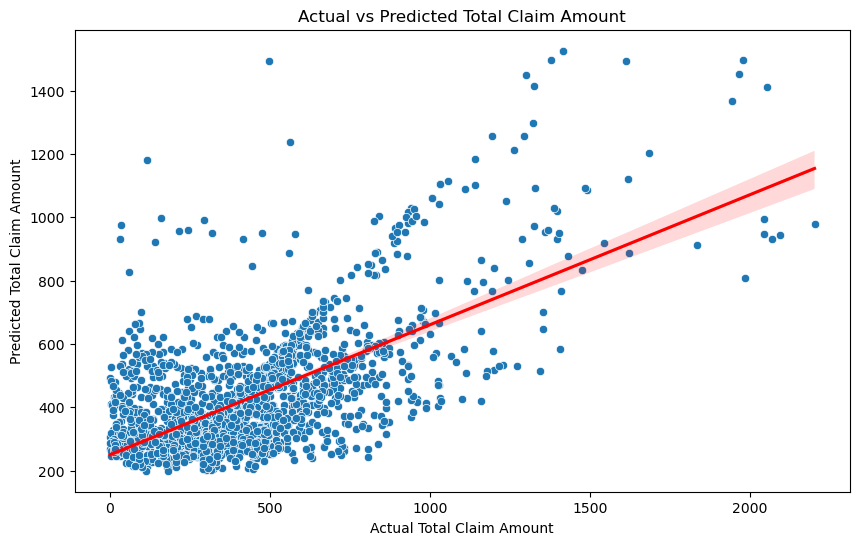

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red') 
plt.xlabel('Actual Total Claim Amount')
plt.ylabel('Predicted Total Claim Amount')
plt.title('Actual vs Predicted Total Claim Amount')
plt.show()

In [18]:
### Model Interpretation:
print(f'Intercept: {model.intercept_}')
coeff_df = pd.DataFrame(model.coef_, X_df.columns, columns=['Coefficient'])
print(coeff_df)

Intercept: 322.69400522001615
                               Coefficient
customer_lifetime_value         -78.617213
income                         -122.106613
monthly_premium_auto           1293.822169
months_since_last_claim           0.441837
months_since_policy_inception   -10.676884
number_of_open_complaints         1.593050
number_of_policies                8.029217


In [19]:
### Model Validation & Evaluation:

# MSE, RMSE, MAE
print(f'MSE: {mse(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mse(y_test,y_pred))}')
print(f'MAE: {mae(y_test, y_pred)}')

MSE: 48603.25525355552
RMSE: 220.4614597918546
MAE: 150.17517808486429


In [20]:
# R2 and Adjusted R2
print(f'R2: {r2_score(y_test, y_pred)}')
n = len(y_test)
p = X_test_scaled.shape[1]
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
print(f'Adjusted R2: {adj_r2}')


R2: 0.40127309153524027
Adjusted R2: 0.3993054444182199


In [21]:
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                               Coefficient
monthly_premium_auto           1293.822169
number_of_policies                8.029217
number_of_open_complaints         1.593050
months_since_last_claim           0.441837
months_since_policy_inception   -10.676884
customer_lifetime_value         -78.617213
income                         -122.106613


In [22]:
# One-Hot Encoding
categorical_encoded = pd.get_dummies(categorical, drop_first=True)

In [23]:
X_df = pd.concat([numerical.drop("total_claim_amount", axis=1), categorical_encoded], axis=1)


In [24]:
# Resplitting
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Rescaling
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retraining
model = lm.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Printing out metrics after adding new features
print(f'MSE: {mse(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mse(y_test,y_pred))}')
print(f'MAE: {mae(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')
n = len(y_test)
p = X_test_scaled.shape[1]
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
print(f'Adjusted R2: {adj_r2}')

MSE: 18514.484097045868
RMSE: 136.06793926949092
MAE: 94.53460539201356
R2: 0.7719263911971552
Adjusted R2: 0.7597864455339185
